In [ ]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
from sklearn import preprocessing
#reading the csv file , del 2 columns from the file , checking first few rows of the file
from google.colab import files
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['BuyComputer.csv']))
data.drop(columns=['User ID',],axis=1,inplace=True)
data.head()

Saving BuyComputer.csv to BuyComputer.csv


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
data.shape

(400, 3)

In [ ]:
X = data[["Age", "EstimatedSalary"]]
y = data["Purchased"]
X, y

(     Age  EstimatedSalary
 0     19            19000
 1     35            20000
 2     26            43000
 3     27            57000
 4     19            76000
 ..   ...              ...
 395   46            41000
 396   51            23000
 397   50            20000
 398   36            33000
 399   49            36000
 
 [400 rows x 2 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 395    1
 396    1
 397    1
 398    0
 399    1
 Name: Purchased, Length: 400, dtype: int64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=90)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_train.head()

((320, 2), (80, 2), (320,), (80,),      Age  EstimatedSalary
 360   43           129000
 151   41            45000
 13    32            18000
 353   37            57000
 130   31            58000)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
y_train, y_test = y_train.tolist(), y_test.tolist()
X_test = sc.transform(X_test)
X_train[:5], y_train[:5]

(array([[ 0.4938394 ,  1.75473619],
        [ 0.30671257, -0.73023872],
        [-0.53535817, -1.52898065],
        [-0.06754109, -0.3752423 ],
        [-0.62892159, -0.34565927]]), [1, 0, 0, 0, 0])

In [ ]:
import math

def model(x_age, x_salary, theta_0, theta_age, theta_salary):
  return 1 / (1 + math.exp(-1 * (theta_0 + theta_age*x_age + theta_salary*x_salary)))


In [ ]:
math.exp(2), math.exp(1)**2, np.exp(1)

(7.38905609893065, 7.3890560989306495, 2.718281828459045)

In [ ]:
import math

def loss(y_pred, y_actual):
  return (y_actual) and (-1 * math.log10(y_pred)) or (-1 * math.log10(1 - y_pred))

In [ ]:
loss(model(X_train[0][0], X_train[0][1],1,1,1), y_train[0]), y_train[0], model(X_train[0][0], X_train[0][1],1,1,1)


(0.01654426452287247, 1, 0.9626218948249292)

In [ ]:
# Update rule
def update(theta, lr, m, y_pred, y_actual, feature_i=0):
  summation = 0
  for i in range(len(y_pred)):
    summation = summation + (y_pred[i] - y_actual[i])*(feature_i and feature_i[i] or 1)
  # print("summ: ",summation)
  return theta - (lr/m)*summation

In [ ]:
# For 1 epoch
# We have model, loss fn, and update rule
theta_0, theta_age, theta_salary = 1,1,1
epochs = 10 # 100
learning_rate = 10

X_train_df = pd.DataFrame(X_train, columns=["Age", "EstimatedSalary"])
age = X_train_df["Age"].tolist()
estimated_salary = X_train_df["EstimatedSalary"].tolist()

for j in range(epochs):
  y_train_pred = []
  m = len(X_train)
  for i in range(m):
    y_train_pred.append(model(X_train[i][0], X_train[i][1], theta_0, theta_age, theta_salary))
    loss_value = loss(y_train_pred[i], y_train[i])
  print(f"Epoch {j} Iteration {i+1}: Loss: ",loss_value)
  theta_0 = update(theta_0, learning_rate, m, y_train_pred, y_train)
  theta_age = update(theta_age, learning_rate, m, y_train_pred, y_train, age)
  theta_salary = update(theta_salary, learning_rate, m, y_train_pred, y_train, estimated_salary)
  # print("New theta values: ",theta_0, theta_age, theta_salary)

Epoch 0 Iteration 320: Loss:  0.01107199784400244
Epoch 1 Iteration 320: Loss:  0.042578411554429256
Epoch 2 Iteration 320: Loss:  0.005340938405536884
Epoch 3 Iteration 320: Loss:  0.009812186053010612
Epoch 4 Iteration 320: Loss:  0.00949945165186644
Epoch 5 Iteration 320: Loss:  0.010367993470434269
Epoch 6 Iteration 320: Loss:  0.010693748025468543
Epoch 7 Iteration 320: Loss:  0.011037533213678905
Epoch 8 Iteration 320: Loss:  0.011247123292324194
Epoch 9 Iteration 320: Loss:  0.011407636532469682


In [ ]:
y_test_pred = []
for i in range(len(X_test)):
  if model(X_test[i][0], X_test[i][1], theta_0, theta_age, theta_salary) < 0.5:
    y_test_pred.append(0)
  else:
    y_test_pred.append(1)

accuracy = 0 # (TP + TN)/Total
precision = 0 # (TP/TP+FP)
recall = 0 # (TP/TP+FN)
# F_Score = 2PR/(P+R)
TP, FP, TN, FN = 0,0,0,0

for i in range(len(X_test)):
  if y_test_pred[i]==1 and y_test[i]==1:
    TP = TP+1
  if y_test[i]==0 and y_test_pred[i]==1:
    FP = FP+1
  if y_test_pred[i]==0 and y_test[i]==0:
    TN = TN+1
  if y_test_pred[i]==0 and y_test[i]==1:
    FN = FN+1
    
accuracy = (TP+TN)/len(X_test)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F_Score = (2*precision*recall)/(precision+recall)
print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF Score: {F_Score}")

Accuracy: 0.9125
Precision: 0.9523809523809523
Recall: 0.7692307692307693
F Score: 0.8510638297872339


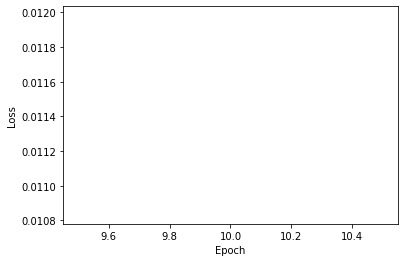

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs,loss_value)
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.legend()
plt.show()

Using sklearn LogisticRegression model

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 90)

LR.fit(X_train, y_train)
print(X_test.shape)
y_pred = LR.predict(X_test)

(80, 2)


In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1 score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.9125
Precision: 0.9523809523809523
Recall: 0.7692307692307693
F1 score: 0.8510638297872339


In [ ]:
LR.predict([[28,76000]])

array([1])

Thus a person whose age is 28 years and his/her estimated salary is 76000 , will purchase a computer
